# Webscraping Craigslist for House Prices in the East Bay

### Jennifer Jones, PhD
<jennifer.jones@cal.berkeley.edu>

In [1]:
# Python 3.4
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs4

Populating the interactive namespace from numpy and matplotlib


## Craigslist houses for sale

Look on the Craigslist website, select relevant search criteria, and then take a look at the web address:

Houses for sale in the East Bay:  
[http://sfbay.craigslist.org/search/eby/rea?housing_type=6](http://sfbay.craigslist.org/search/eby/rea?housing_type=6)

Houses for sale in selected neighborhoods in the East Bay:  
[http://sfbay.craigslist.org/search/eby/rea?nh=46&nh=47&nh=48&nh=49&nh=112&nh=54&nh=55&nh=60&nh=62&nh=63&nh=66&housing_type=6](http://sfbay.craigslist.org/search/eby/rea?nh=46&nh=47&nh=48&nh=49&nh=112&nh=54&nh=55&nh=60&nh=62&nh=63&nh=66&housing_type=6) 


In [2]:
# Get the data: Houses posted for sale on Craigslist in the Eastbay
url_base = 'http://sfbay.craigslist.org/search/eby/rea?housing_type=6' 
data = requests.get(url_base)
print(data.url)

http://sfbay.craigslist.org/search/eby/rea?housing_type=6


In [3]:
# BeautifulSoup can quickly parse the text, need to tell bs4 that the text is html
html = bs4(data.text, 'html.parser')

In [9]:
# Display the html in a somewhat readable way, to note the structure of housing listings
# then comment it out because it prints out a large amount to the screen
# print(html.prettify())

## House entries

In [4]:
# Looked through above output and saw housing entries contained in <p class="row">

# Get a list of housing data and store the results
houses = html.find_all('p', attrs={'class': 'row'}) # html.findAll(attrs={'class': "row"})
print(len(houses))

100


In [7]:
# List neighborhoods of the houses in the list
neighborhoods = pd.DataFrame(data = ones(len(houses)), columns = {'Neighborhoods'})
n = 0
for row in range(len(houses)-1):
    one_neighborhood = houses[n].findAll(attrs={'class': 'pnr'})[0].text
    neighborhoods.iloc[n] = one_neighborhood
    n += 1
#print(neighborhoods)

## Look at a single entry - for one house
To explore the data before working with the whole dataset.

In [11]:
# There's a consistent structure to each housing listing:
# There is a 'time', 
# a <span class="price">, 
# a 'housing', 
# a <span class="pnr"> neighborhood field

# Look at info for a single house
one_house = houses[11] # 11, 19, 28 is the selected row number for a housing listing

# Print out and view a single house entry, use prettify to make more legible
print(one_house.prettify())

<p class="row" data-pid="5435512814">
 <a class="i" data-ids="0:00i0i_5wOYOWgpigj,0:01313_kVRkR5KuWKy,0:00V0V_itCBgm2OaMO,0:00404_kLqJxhlIffA,0:00r0r_eJPbw1PURsK,0:00D0D_toh93xIhAv,0:00o0o_hZrlOFHmOtq,0:00A0A_1rbMRl7UegY,0:00R0R_gEG5hSz70ay,0:00E0E_4qXeNIMmPXZ,0:01717_jkC1pF5Ng8T,0:00q0q_keqedGCLN3Y,0:01313_3n33XE8aWCo" href="/eby/reb/5435512814.html">
 </a>
 <span class="txt">
  <span class="star">
  </span>
  <span class="pl">
   <time datetime="2016-02-05 16:26" title="Fri 05 Feb 04:26:09 PM">
    Feb 5
   </time>
   <a class="hdrlnk" data-id="5435512814" href="/eby/reb/5435512814.html">
    RICHMOND ANNEX - Adorable Updated Bungalow. OPEN SUN 1-3
   </a>
  </span>
  <span class="l2">
   <span class="price">
    $469000
   </span>
   <span class="housing">
    / 2br - 817ft
    <sup>
     2
    </sup>
    -
   </span>
   <span class="pnr">
    <small>
     (richmond / point / annex)
    </small>
    <span class="px">
     <span class="p">
      pic
      <span class="maptag" data-pi

A single housing entry looks like this:

<p class="row" data-pid="5434788772" data-repost-of="5355580942">
 <a class="i" data-ids="0:00N0N_iJtLy33ZoH8,0:00N0N_iJtLy33ZoH8,0:00G0G_TjCb4MW8vL,0:00K0K_k81VU0LUbQY,0:01313_fVvAnbOJv15,0:00b0b_g31lNUegSPp,0:00606_hZwz7JY1p7Y,0:00909_1Kedy8CYMdC,0:01313_gazwY7Ur82i,0:00202_af2wTsicuhA,0:00K0K_1Jm1oKML6pU,0:00s0s_7BOtkml8sUj,0:00h0h_fjOOi8ydLtF" href="/eby/reb/5434788772.html">
 </a>
 <span class="txt">
  <span class="star">
  </span>
  <span class="pl">
   <time datetime="2016-02-05 08:55" title="Fri 05 Feb 08:55:07 AM">
    Feb 5
   </time>
   <a class="hdrlnk" data-id="5434788772" href="/eby/reb/5434788772.html">
    OPEN House Sunday 2-4pm, For SALE Spacious 2 Bedroom, 1 Bathroom Home
   </a>
  </span>
  <span class="l2">
   <span class="price">
    $440000
   </span>
   <span class="housing">
    / 2br - 1156ft
    <sup>
     2
    </sup>
    -
   </span>
   <span class="pnr">
    <small>
     (Oakland)
    </small>
    <span class="px">
     <span class="p">
      pic
      <span class="maptag" data-pid="5434788772">
       map
      </span>
     </span>
    </span>
   </span>
  </span>
  <span class="js-only banish-unbanish">
   <span class="banish" title="hide">
    <span class="trash">
    </span>
   </span>
   <span class="unbanish" title="restore">
    <span class="trash red">
    </span>
   </span>
  </span>
 </span>
</p>

<p class="row" data-pid="5433676803" data-repost-of="5414688273">
 <a class="i" data-ids="0:00808_dgD6sMXvscr,0:00o0o_g8e6j9elDPU,0:00D0D_1ASSvbr4ji5,0:00y0y_5BDXnFKvcCg,0:00L0L_2tqVoeDNfer,0:00m0m_jsPZJtgSSJF,0:00202_iOyrLKhYx4a,0:00101_5cAhwpbhsBt,0:00U0U_2UkxFRw5Lj1,0:00Z0Z_2uLprMUbHjz,0:00p0p_jfCizNzlCI7,0:00303_45wmy0xh4dG,0:00P0P_i58qE8i45tT,0:00G0G_iaoe8wdRH7H,0:00p0p_jCIjJ2rA6pW" href="/eby/reb/5433676803.html">
 </a>
 <span class="txt">
  <span class="star">
  </span>
  <span class="pl">
   <time datetime="2016-02-04 12:33" title="Thu 04 Feb 12:33:18 PM">
    Feb 4
   </time>
   <a class="hdrlnk" data-id="5433676803" href="/eby/reb/5433676803.html">
    OPEN HOUSE SAT 1-4 Sunny Richmond Home
   </a>
  </span>
  <span class="l2">
   <span class="housing">
    3br - 1330ft
    <sup>
     2
    </sup>
    -
   </span>
   <span class="pnr">
    <small>
     (richmond / point / annex)
    </small>
    <span class="px">
     <span class="p">
      pic
      <span class="maptag" data-pid="5433676803">
       map
      </span>
     </span>
    </span>
   </span>
  </span>
  <span class="js-only banish-unbanish">
   <span class="banish" title="hide">
    <span class="trash">
    </span>
   </span>
   <span class="unbanish" title="restore">
    <span class="trash red">
    </span>
   </span>
  </span>
 </span>
</p>

<p class="row" data-pid="5433612326">
 <a class="i" data-ids="0:00Q0Q_htb9rv5xsF6,0:00J0J_8fQcbC1GN0K,0:00C0C_fWSz7oQ64wG,0:00X0X_fFkvYwa1egh,0:01717_5p2bu1Txk3P,0:00U0U_9lTAjtB6OT3,0:00b0b_19p3EtCFxMf,0:00v0v_5Ny1hBHiN69,0:00v0v_1TW0gNDOnnE,0:00l0l_h9cpsiY9FJB,0:00F0F_7c5FQ2LdYGP,0:00W0W_h8naPbNyKg6,0:00d0d_9SFc0l0Q7he,0:00S0S_auVynUzYLdJ" href="/eby/reb/5433612326.html">
 </a>
 <span class="txt">
  <span class="star">
  </span>
  <span class="pl">
   <time datetime="2016-02-04 11:52" title="Thu 04 Feb 11:52:28 AM">
    Feb 4
   </time>
   <a class="hdrlnk" data-id="5433612326" href="/eby/reb/5433612326.html">
    Millsmont House For Sale
   </a>
  </span>
  <span class="l2">
   <span class="price">
    $579950
   </span>
   <span class="housing">
    / 3br - 1912ft
    <sup>
     2
    </sup>
    -
   </span>
   <span class="pnr">
    <small>
     (oakland hills / mills)
    </small>
    <span class="px">
     <span class="p">
      pic
      <span class="maptag" data-pid="5433612326">
       map
      </span>
     </span>
    </span>
   </span>
  </span>
  <span class="js-only banish-unbanish">
   <span class="banish" title="hide">
    <span class="trash">
    </span>
   </span>
   <span class="unbanish" title="restore">
    <span class="trash red">
    </span>
   </span>
  </span>
 </span>
</p>



<p class="row" data-pid="5432692610" data-repost-of="5137664009">
 <a class="i" data-ids="0:00303_h5PfjA9mASD" href="/eby/reb/5432692610.html">
 </a>
 <span class="txt">
  <span class="star">
  </span>
  <span class="pl">
   <time datetime="2016-02-03 19:42" title="Wed 03 Feb 07:42:39 PM">
    Feb 3
   </time>
   <a class="hdrlnk" data-id="5432692610" href="/eby/reb/5432692610.html">
    Excellent Home in Berkeley
   </a>
  </span>
  <span class="l2">
   <span class="price">
    $450000
   </span>
   <span class="pnr">
    <small>
     (berkeley)
    </small>
    <span class="px">
     <span class="p">
      pic
     </span>
    </span>
   </span>
  </span>
  <span class="js-only banish-unbanish">
   <span class="banish" title="hide">
    <span class="trash">
    </span>
   </span>
   <span class="unbanish" title="restore">
    <span class="trash red">
    </span>
   </span>
  </span>
 </span>
</p>


<p class="row" data-pid="5432698438" data-repost-of="5113860864">
 <a class="i" data-ids="0:00U0U_7EFsiQLPVhn" href="/eby/reb/5432698438.html">
 </a>
 <span class="txt">
  <span class="star">
  </span>
  <span class="pl">
   <time datetime="2016-02-03 19:33" title="Wed 03 Feb 07:33:29 PM">
    Feb 3
   </time>
   <a class="hdrlnk" data-id="5432698438" href="/eby/reb/5432698438.html">
    Conveniently located in Albany
   </a>
  </span>
  <span class="l2">
   <span class="price">
    $600000
   </span>
   <span class="pnr">
    <small>
     (albany / el cerrito)
    </small>
    <span class="px">
     <span class="p">
      pic
     </span>
    </span>
   </span>
  </span>
  <span class="js-only banish-unbanish">
   <span class="banish" title="hide">
    <span class="trash">
    </span>
   </span>
   <span class="unbanish" title="restore">
    <span class="trash red">
    </span>
   </span>
  </span>
 </span>
</p>


In [14]:
# For one housing entry look at fields of interest: Price, Neighborhood, Size, Date Posted 
# Clean up values manually, to figure out how to automate

# Listing
allspecs = one_house.findAll(attrs={'class': 'l2'})[0].text # `findAll` returns a list, and there's only one entry in this html
print('Listing: \n', allspecs, '\n')

# Price
print('Price:')

price = one_house.findAll(attrs={'class': 'price'})[0].text
print(price)

price = float(one_house.find('span', {'class': 'price'}).text.strip('$'))
print(price, '\t', type(price), '\n')

# Neighborhood
print('Neighborhood:')

neighborhood = one_house.findAll(attrs={'class': 'pnr'})[0].text
print(neighborhood)

# Keep the neighborhood, remove leading spaces and parentheses. 
# Then split at the closing parentheses and only take the neighborhood part
# example: '   (vallejo / benicia)   pic map  '
neighborhood = one_house.findAll(attrs={'class': 'pnr'})[0].text.strip(' (').split(')')[0]
print(neighborhood, '\t', type(neighborhood), '\n')

#print(len([rw.findAll(attrs={'class': 'pnr'})[0].text.strip(' (').split(')')[0] for rw in houses]))

# Size
print('Size: bedrooms and sq ft: ')

size = one_house.findAll(attrs={'class': 'housing'})[0].text
print(size)

# Strip text of leading and trailing characters: /, dashes, and spaces
# Split number of bedrooms and square footage into 2 fields in list
size = one_house.findAll(attrs={'class': 'housing'})[0].text.strip('/- ').split(' - ')
print(size) 

# Delete suffixes and just keep the numbers 
size[0] = float(size[0].replace('br', '')) # number of bedrooms
size[1] = float(size[1].replace('ft2', '')) # square footage

print(size, '\t', type(size[0]), '\n') 

# Address/Posting Title
address = one_house.findAll(attrs={'class': 'hdrlnk'})[0].text
print(address,  '\n')
#link = 'http://sfbay.craigslist.org/search' + one_house.findAll(attrs={'class': 'hdrlnk'})[0]['href']
#print(link, '\n')

# Date posted
dateposted = one_house.findAll(attrs={'class': 'pl'})[0].time['datetime']
print(dateposted, '\t', type(dateposted))

# Convert to datetime type so can extract date
date = pd.to_datetime(one_house.find('time')['datetime']).date()
print(date, '\t', type(date))

Listing: 
  $469000 / 2br - 817ft2 -    (richmond / point / annex)   pic map   

Price:
$469000
469000.0 	 <class 'float'> 

Neighborhood:
  (richmond / point / annex)   pic map 
richmond / point / annex 	 <class 'str'> 

Size: bedrooms and sq ft: 
/ 2br - 817ft2 - 
['2br', '817ft2']
[2.0, 817.0] 	 <class 'float'> 

RICHMOND ANNEX - Adorable Updated Bungalow. OPEN SUN 1-3 

2016-02-05 16:26 	 <class 'str'>
2016-02-05 	 <class 'datetime.date'>


## All rows, all housing entries 
Now that I've figured out how to extract data for 1 house, do for the list of houses

In [15]:
# Define 4 functions for the price, neighborhood, sq footage & # bedrooms, and time
# that can deal with missing values (to prevent errors from showing up when running the code)

# Prices
def find_prices(results):
    prices = []
    for rw in results:
        price = rw.find('span', {'class': 'price'})
        if price is not None:
            price = float(price.text.strip('$'))
        else:
            price = np.nan
        prices.append(price)
    return prices

# Neighborhoods
# Example: '  (oakland hills / mills)   pic map  '
# Define a function for neighborhood in case a field is missing in 'class': 'pnr'
def find_neighborhood(results):
    neighborhoods = []
    for rw in results:
        split = rw.find('span', {'class': 'pnr'}).text.strip(' (').split(')')
        #split = rw.find(attrs={'class': 'pnr'}).text.strip(' (').split(')')
        if len(split) == 2:
            neighborhood = split[0]
        elif 'pic map' or 'pic' or 'map' in split[0]:
            neighborhood = np.nan
        neighborhoods.append(neighborhood)
    return neighborhoods

# Size
# Make a function to deal with size in case #br or ft2 is missing
def find_size_and_brs(results):
    sqft = []
    bedrooms = []
    for rw in results:
        split = rw.find('span', attrs={'class': 'housing'})
        # If the field doesn't exist altogether in a housing entry
        if split is not None:
        #if rw.find('span', {'class': 'housing'}) is not None:
            # Removes leading and trailing spaces and dashes, splits br & ft
            #split = rw.find('span', attrs={'class': 'housing'}).text.strip('/- ').split(' - ')
            split = split.text.strip('/- ').split(' - ')
            if len(split) == 2:
                n_brs = split[0].replace('br', '')
                size = split[1].replace('ft2', '')
            elif 'br' in split[0]: # in case 'size' field is missing
                n_brs = split[0].replace('br', '')
                size = np.nan
            elif 'ft2' in split[0]: # in case 'br' field is missing
                size = split[0].replace('ft2', '')
                n_brs = np.nan
        else:
            size = np.nan
            n_brs = np.nan
        sqft.append(float(size))
        bedrooms.append(float(n_brs))
    return sqft, bedrooms

# Time posted
def find_times(results):
    times = []
    for rw in results:
        time = rw.findAll(attrs={'class': 'pl'})[0].time['datetime']
        if time is not None:
            time# = time
        else:
            time = np.nan
        times.append(time)
    return pd.to_datetime(times)


In [16]:
prices = find_prices(houses)
neighborhoods = find_neighborhood(houses) 
sqft, bedrooms = find_size_and_brs(houses)
times = find_times(houses)

# Check
print(len(prices))
print(len(neighborhoods))
print(len(sqft))
print(len(bedrooms))
print(len(times))

100
100
100
100
100


In [18]:
# Add the data to a dataframe so I can work with it

housesdata = np.array([prices, sqft, bedrooms]).T
#print(housesdata)

# Add the array to the dataframe, then the dates column and the neighborhoods column
housesdf = pd.DataFrame(data = housesdata, columns = ['Price', 'SqFeet', 'nBedrooms'])
housesdf['DatePosted'] = times
housesdf['Neighborhood'] = neighborhoods

print(housesdf.tail(5))

      Price  SqFeet  nBedrooms          DatePosted  \
95   280000    1379          3 2016-02-05 10:32:00   
96   650000    1320          3 2016-02-05 10:27:00   
97  3699000    6641          5 2016-02-05 10:25:00   
98   660000    1300          3 2016-02-05 10:25:00   
99   625000    1350          3 2016-02-05 10:24:00   

                       Neighborhood  
95              pittsburg / antioch  
96             danville / san ramon  
97             danville / san ramon  
98  dublin / pleasanton / livermore  
99  dublin / pleasanton / livermore  


In [19]:
print(housesdf.dtypes)

Price                  float64
SqFeet                 float64
nBedrooms              float64
DatePosted      datetime64[ns]
Neighborhood            object
dtype: object


100

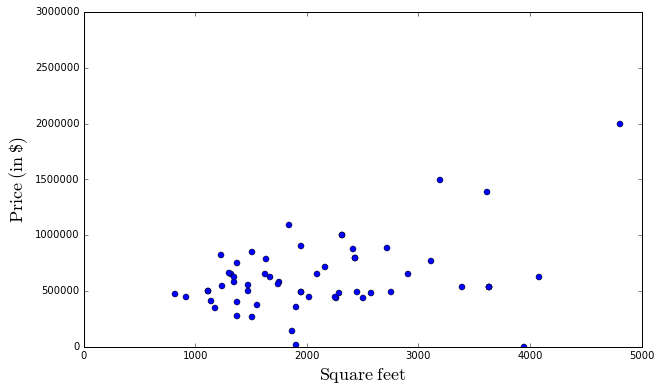

In [22]:
# Quick plot to look at the data

fig = plt.figure() 
fig.set_figheight(6.0)
fig.set_figwidth(10.0)

ax = fig.add_subplot(111) # row column position 
ax.plot(housesdf.SqFeet, housesdf.Price, 'bo')
ax.set_xlim(0,5000)
ax.set_ylim(0,3000000)
ax.set_xlabel('$\mathrm{Square \; feet}$',fontsize=18)
ax.set_ylabel('$\mathrm{Price \; (in \; \$)}$',fontsize=18)

len(housesdf.SqFeet)

100

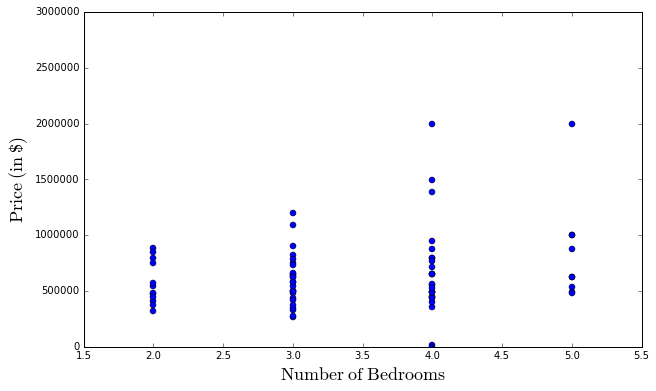

In [23]:
# Quick plot to look at the data

fig = plt.figure() 
fig.set_figheight(6.0)
fig.set_figwidth(10.0)

ax = fig.add_subplot(111) # row column position 
ax.plot(housesdf.nBedrooms, housesdf.Price, 'bo')
ax.set_xlim(1.5, 5.5)
ax.set_ylim(0,3000000)
ax.set_xlabel('$\mathrm{Number \; of \; Bedrooms}$',fontsize=18)
ax.set_ylabel('$\mathrm{Price \; (in \; \$)}$',fontsize=18)

len(housesdf.nBedrooms)

In [29]:
# Get houses listed in Berkeley
#housesdf[housesdf['Neighborhood'] == 'berkeley']
housesdf[housesdf['Neighborhood'] == 'berkeley north / hills']
#housesdf[housesdf['Neighborhood'] == 'oakland rockridge / claremont']
#housesdf[housesdf['Neighborhood'] == 'albany / el cerrito']
#housesdf[housesdf['Neighborhood'] == 'richmond / point / annex']

,Price,SqFeet,nBedrooms,DatePosted,Neighborhood
28,795000,NaN,2,2016-02-05 15:20:00,berkeley north / hills
30,879000,NaN,5,2016-02-05 15:11:00,berkeley north / hills


In [46]:
# How many houses for sale are under $700k?
print(housesdf[(housesdf.Price < 700000)].count(), '\n') # nulls aren't counted in count

# In which neighborhoods are these houses located?
print(set(housesdf[(housesdf.Price < 700000)].Neighborhood))

# Return entries for houses under $700k, sorted by price from least expensive to most
housesdf[(housesdf.Price < 700000)].sort_values(['Price'], ascending = [True])

Price           53
SqFeet          43
nBedrooms       51
DatePosted      53
Neighborhood    52
dtype: int64 

{nan, 'brentwood / oakley', 'vallejo / benicia', 'oakland west', 'hayward / castro valley', 'dublin / pleasanton / livermore', 'concord / pleasant hill / martinez', 'Oakland', 'Tracy', 'walnut creek', 'oakland hills / mills', 'oakland east', 'pittsburg / antioch', 'richmond / point / annex', 'hercules, pinole, san pablo, el sob', 'fairfield / vacaville', 'san leandro', 'danville / san ramon', 'fremont / union city / newark', 'CONCORD', 'albany / el cerrito', 'Fair Oaks'}


,Price,SqFeet,nBedrooms,DatePosted,Neighborhood
45,1300,3950,4,2016-02-05 14:22:00,"hercules, pinole, san pablo, el sob"
24,20000,1900,4,2016-02-05 15:38:00,vallejo / benicia
39,145000,1872,NaN,2016-02-05 14:45:00,dublin / pleasanton / livermore
46,270000,1511,3,2016-02-05 14:20:00,pittsburg / antioch
95,280000,1379,3,2016-02-05 10:32:00,pittsburg / antioch
92,319000,NaN,2,2016-02-05 10:41:00,Oakland
31,329000,NaN,3,2016-02-05 15:07:00,brentwood / oakley
60,350000,1176,3,2016-02-05 13:06:00,CONCORD
55,360000,1905,4,2016-02-05 13:52:00,fairfield / vacaville
86,373000,1552,3,2016-02-05 10:59:00,fairfield / vacaville


## Group results by neighborhood and plot

In [47]:
by_neighborhood = housesdf.groupby('Neighborhood')
print(by_neighborhood.count())#.head()) # NOT NULL records within each column
#print('\n')

#print(by_neighborhood.size())#.head()) # total records for each neighborhood
#by_neighborhood.Neighborhood.nunique()

                                     Price  SqFeet  nBedrooms  DatePosted
Neighborhood                                                             
CONCORD                                  1       1          1           1
El Sobrante 7.5 miles from Orinda        0       1          1           1
Fair Oaks                                1       1          1           1
HAYWARD                                  0       0          0           1
Oakland                                  1       0          1           1
PLEASANTON-DUBLIN-LIVERMORE              0       0          0           1
San Diego                                0       2          0           2
Tracy                                    3       3          3           3
albany / el cerrito                      3       0          3           3
berkeley north / hills                   2       0          2           2
brentwood / oakley                       5       4          5           6
concord / pleasant hill / martinez    

In [48]:
print(len(housesdf.index)) # total #rows
print(len(set(housesdf.Neighborhood))) # #unique neighborhoods
set(housesdf.Neighborhood) # list the #unique neighborhoods

100
28


{'brentwood / oakley',
 nan,
 'vallejo / benicia',
 'oakland west',
 'hayward / castro valley',
 'dublin / pleasanton / livermore',
 'PLEASANTON-DUBLIN-LIVERMORE',
 'concord / pleasant hill / martinez',
 'Oakland',
 'Tracy',
 'walnut creek',
 'oakland hills / mills',
 'oakland east',
 'berkeley north / hills',
 'pittsburg / antioch',
 'San Diego',
 'richmond / point / annex',
 'hercules, pinole, san pablo, el sob',
 'El Sobrante 7.5 miles from Orinda',
 'fairfield / vacaville',
 'san leandro',
 'danville / san ramon',
 'HAYWARD',
 'fremont / union city / newark',
 'CONCORD',
 'albany / el cerrito',
 'oakland rockridge / claremont',
 'Fair Oaks'}

In [50]:
# Group the results by neighborhood, and then take the average home price in each neighborhood
by_neighborhood = housesdf.groupby('Neighborhood').mean().Price # by_neighborhood_mean_price
print(by_neighborhood.head(5), '\n')
print(by_neighborhood['berkeley north / hills'], '\n') 
#print(by_neighborhood.index, '\n') 

by_neighborhood_sort_price = by_neighborhood.sort_values(ascending = True)
#print(by_neighborhood_sort_price.index) # a list of the neighborhoods sorted by price
print(by_neighborhood_sort_price)

Neighborhood
CONCORD                              350000
El Sobrante 7.5 miles from Orinda       NaN
Fair Oaks                            479900
HAYWARD                                 NaN
Oakland                              319000
Name: Price, dtype: float64 

837000.0 

Neighborhood
hercules, pinole, san pablo, el sob       1300.000000
Oakland                                 319000.000000
CONCORD                                 350000.000000
oakland hills / mills                   379000.000000
pittsburg / antioch                     382600.000000
oakland east                            404500.000000
walnut creek                            450000.000000
Fair Oaks                               479900.000000
hayward / castro valley                 528258.666667
richmond / point / annex                528666.666667
Tracy                                   535000.000000
oakland west                            550000.000000
concord / pleasant hill / martinez      578000.000000
brentwood /

The average home price in berkeley north / hills is: $  837,000 

The most expensive home price in berkeley north / hills is:  $  879,000 

The least expensive home price in berkeley north / hills is: $   795,000 



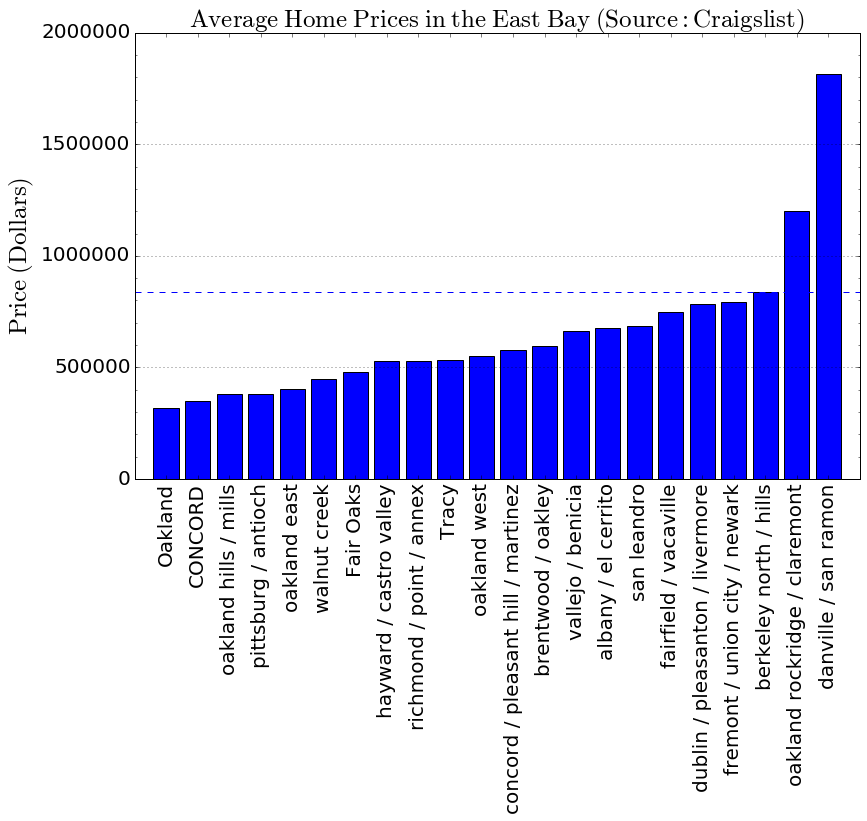

In [56]:
# Plot average home price for each neighborhood in the East Bay
# dropna()

fig = plt.figure() # or fig = plt.figure(figsize=(15,8)) # width, height
fig.set_figheight(8.0)
fig.set_figwidth(13.0)
ax = fig.add_subplot(111) # row column position 

fntsz=20
titlefntsz=25
lablsz=20
mrkrsz=8

matplotlib.rc('xtick', labelsize = lablsz); matplotlib.rc('ytick', labelsize = lablsz)

# Choose a baseline, based on proximity to current location
# 'berkeley', 'berkeley north / hills', 'albany / el cerrito'
neighborhood_name = 'berkeley north / hills'

# Plot a bar chart
ax.bar(range(len(by_neighborhood_sort_price.dropna())), by_neighborhood_sort_price.dropna(), align='center')

# Add a horizontal line for Berkeley's (or the baseline's) average home price, corresponds with Berkeley bar
ax.axhline(y=housesdf.groupby('Neighborhood').mean().Price.ix[neighborhood_name], linestyle='--')

# Add a grid
ax.grid(b = True, which='major', axis='y') # which='major','both'; options/kwargs: color='r', linestyle='-', linewidth=2)

# Format x axis
ax.set_xticks(range(1,len(housesdf.groupby('Neighborhood').mean().Price.dropna()))); # 0 if first row is at least 100,000
ax.set_xticklabels(by_neighborhood_sort_price.dropna().index[1:], rotation='vertical', fontsize=fntsz) # remove [1:], 90, 45, 'vertical'
ax.set_xlim(0, len(by_neighborhood_sort_price.dropna().index)) # -1 if first row is at least 100,000

# Format y axis
minor_yticks  = np.arange(0, 2000000, 100000)
ax.set_yticks(minor_yticks, minor = True) 
ax.tick_params(axis='y', labelsize=fntsz)
ax.set_ylabel('$\mathrm{Price \; (Dollars)}$', fontsize = titlefntsz)

# Set figure title
ax.set_title('$\mathrm{Average \; Home \; Prices \; in \; the \; East \; Bay \; (Source: Craigslist)}$', fontsize = titlefntsz)

# Save figure
#plt.savefig("home_prices.pdf", bbox_inches='tight')

# Home prices in Berkeley (or the baseline)
print('The average home price in %s is: $' %neighborhood_name, '{0:8,.0f}'.format(housesdf.groupby('Neighborhood').mean().Price.ix[neighborhood_name]), '\n')
print('The most expensive home price in %s is:  $' %neighborhood_name, '{0:8,.0f}'.format(housesdf.groupby('Neighborhood').max().Price.ix[neighborhood_name]), '\n')
print('The least expensive home price in %s is: $' %neighborhood_name, '{0:9,.0f}'.format(housesdf.groupby('Neighborhood').min().Price.ix[neighborhood_name]), '\n')

Copyright Jennifer L. Jones, 2015, 2016